In [ ]:
from google.colab import files
uploaded = files.upload()

Saving google-stock-price.zip to google-stock-price.zip


In [ ]:
!unzip google-stock-price.zip

Archive:  google-stock-price.zip
  inflating: Google_Stock_Price_Test.csv  
  inflating: Google_Stock_Price_Train.csv  


In [ ]:
import numpy as np                          # untuk matriks
import matplotlib.pyplot as plt             #Matplotlib adalah library 2 dimensi pada Python yang mengolah angka menjadi gambar yang interaktif misalnya, grafik dan table
import pandas as pd                         # merubah data menjadi data table
from keras.models import Sequential         #untuk model neural network kita yang berupa sequential network. Untuk diketahui, dasar dari inisialisasi neural network selain sequential adalah graph.
from keras.layers import Dense              #untuk menjalankan full connection neural network.
from keras.layers import LSTM               #LSTM didesain untuk mengatasi vanishing gradients menggunakan mekanisme gerbang (gate).
from keras.layers import Dropout            # Dropout adalah teknik regularisasi untuk model neural network

Using TensorFlow backend.


In [ ]:
#Mengimport data training set
dataset_train = pd.read_csv ('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:,1:2].values
#membuat variable training_Set yang berisi row kedua dari dataset_Train

In [ ]:
dataset_train #menampilkan dataset_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [ ]:
training_set #menampilkan data Training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [ ]:
"""berfungsi untuk feature scaling atau standardization yaitu data pre 
processing yang di normalisasi untuk mempercepat perhitungan dalam alogaritma nya"""
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
training_set_scaled #hasil data setelah di scaling

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [ ]:
#berfungsi untuk membuat data struktur dengan 60 time steps dan 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
#reshape ulang data X_train
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
#hasil X_train setelah shape
X_train.shape

(1198, 60, 1)

In [ ]:
#inisialisasi RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





1198/1198 [==============================] - 19s 15ms/step - loss: 0.0623
Epoch 2/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0067
Epoch 3/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0054
Epoch 4/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0051
Epoch 5/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0052
Epoch 6/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0049
Epoch 7/100
1198/1198 [==============================] - 13s 10ms/step - loss: 0.0048
Epoch 8/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0050
Epoch 9/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0046
Epoc

In [ ]:
#mengimport dataset test yang berisi data asli dari google stock price tahun 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values
#membuat variable real_stock_price yang berisi row kedua dari dataset_test

In [ ]:
dataset_test.head() #menunjukan data test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [ ]:
real_stock_price #menunjukan data real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [ ]:
# Mendapatkan hasil prediksi dari google stock price dalam bentuk data
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


In [ ]:
dataset_total.head()

0    325.25
1    331.27
2    329.83
3    328.34
4    322.04
Name: Open, dtype: float64

In [ ]:
predicted_stock_price

array([[777.79443],
       [775.08813],
       [775.8212 ],
       [777.17615],
       [780.4819 ],
       [786.35455],
       [791.2711 ],
       [792.87976],
       [793.18097],
       [793.17456],
       [793.13153],
       [792.94196],
       [792.7858 ],
       [793.3992 ],
       [794.35077],
       [799.3176 ],
       [806.1205 ],
       [813.09436],
       [816.41614],
       [811.5187 ]], dtype=float32)

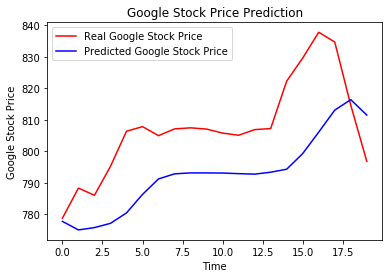

In [ ]:
# menampilkan visualisasi grafik data prediksi dan data asli dari google stock price
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()